In [40]:
%config StoreMagics.autorestore = True
%reset -f
# %store -z
%store -r
%whos

Variable             Type              Data/Info
------------------------------------------------
Tsam                 float             0.1
dvMathcalP           LinearIOSystem    <LinearIOSystem>: sys[91]<...>[[0. 0.]\n     [0. 0.]]\n
extMathcalP          LinearIOSystem    <LinearIOSystem>: sys[90]<...> [0. 0.]\n     [0. 0.]]\n
extMathcalPcl        LinearIOSystem    <LinearIOSystem>: sys[314<...> [0. 0.]\n     [0. 0.]]\n
fullOrder            int               84
hsvDvMathcalP        ndarray           84: 84 elems, type `float64`, 672 bytes
hsvExtMathcalP       ndarray           84: 84 elems, type `float64`, 672 bytes
mathcalC             StateSpace        A = [[-1000.]]\n\nB = [[1<...>00.1]]\n\nD = [[100.1]]\n
mathcalP_cb          LinearIOSystem    <LinearIOSystem>: sys[20]<...>[[0. 0.]\n     [0. 0.]]\n
overlineMathcalC     StateSpace        A = [[-0.]]\n\nB = [[10.]<...>= [[100.1]]\n\ndt = 0.1\n
reducOrder           int               10
truncDvMathcalP      LinearIOSystem    <LinearI

In [41]:
import numpy
import sympy
import scipy
import control
import matplotlib.pyplot as plt

from custom_utils import ControlUtils
from custom_utils import ODEUtils

from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

numpy.set_printoptions(precision=3)
sympy.init_printing(use_latex='mathjax', use_unicode=True)
sympy.init_printing()
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica", "axes.titley": 1.0 })
%matplotlib inline

In [42]:
# Get plant
normInfTruncExtMathcalP = ControlUtils.hinfnorm(truncExtMathcalP)
display(Math('\\lVert \\widehat{\\mathcal{P}_{ext}} \\rVert_{\\infty} = ' + str(normInfTruncExtMathcalP)))

<IPython.core.display.Math object>

In [43]:
# Simulate response
T_step = Tsam/1000
t_ini = 0
t_fin = 5
steps = int(numpy.ceil((t_fin-t_ini)/T_step))

tkVec = numpy.arange(t_ini, t_fin, Tsam)[:, None]
tVec = numpy.linspace(t_ini, t_fin, steps)[:, None]
# uVec = 1e-4*numpy.sin(2*numpy.pi*tVec/0.1)
uVec = 1*numpy.sin(15*tVec)
zerosVec = 0*numpy.zeros((steps,1))
uVec.shape

result = control.input_output_response(truncExtMathcalPcl, tVec.reshape(-1),numpy.column_stack([zerosVec,uVec]).T,\
                                        numpy.zeros((truncExtMathcalPcl.A.shape[0],1)),t_eval=tVec.reshape(-1))


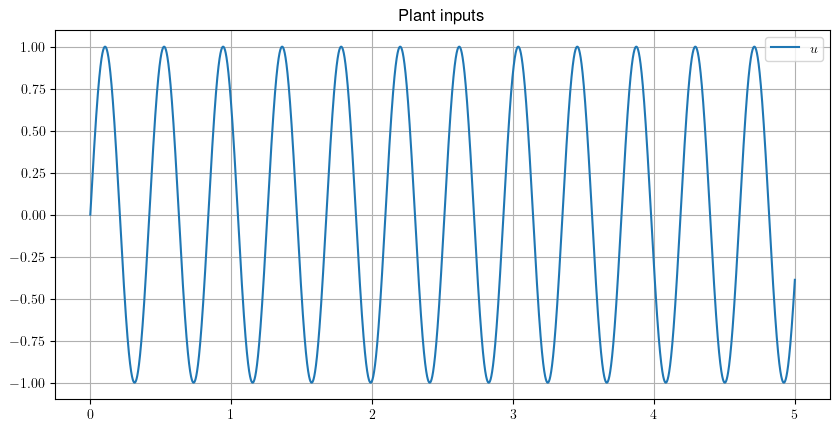

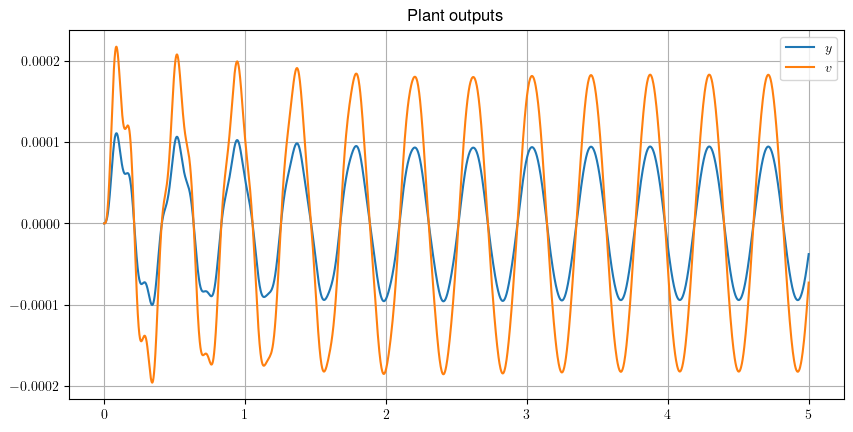

In [44]:
# Compute Reduced Extended Plant outputs
yVec = result.outputs[2][:,None].T
vVec = result.outputs[0][:,None].T

tLims = [t_ini,t_fin]
ODEUtils.plot_inputs(tVec=tVec,tLims=tLims,uVec=uVec)
ODEUtils.plot_outputs(tVec=tVec,tLims=tLims,yVec=yVec,vVec=vVec)